
# Canadian weather dataset

Example of the Canadian weather dataset.


In [16]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np

from FDApy import MultivariateFunctionalData
from FDApy.representation import DenseArgvals
from FDApy.preprocessing import MFPCA

from FDApy import read_csv
from FDApy.visualization import plot, plot_multivariate

In [4]:
# Load data
temp_data = read_csv('./canadian_temperature_daily.csv', index_col=0)
prec_data = read_csv('./canadian_precipitation_daily.csv', index_col=0)

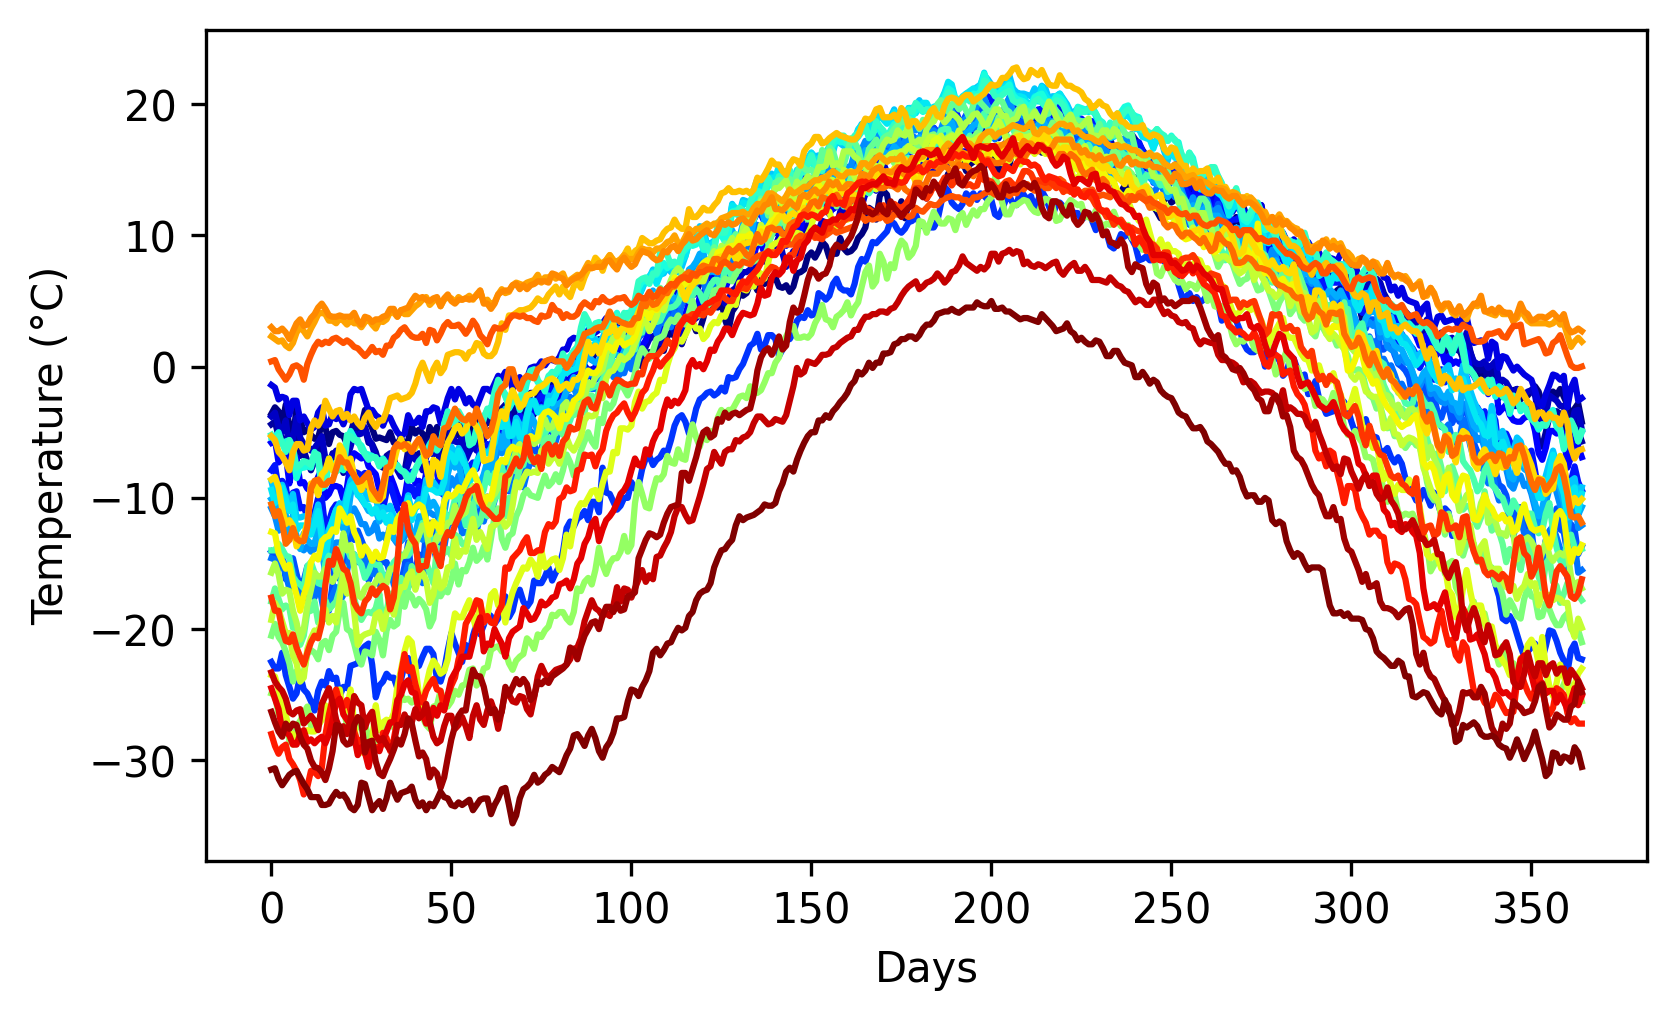

In [6]:
# Plot temperature
plt.figure(figsize=(6.2, 3.6), facecolor='white', edgecolor='black',dpi=300)
ax = plot(temp_data)
ax.set_xlabel('Days')
ax.set_ylabel('Temperature (°C)')

plt.savefig('./figures/temperature.eps', transparent=True, format='eps')
plt.show()

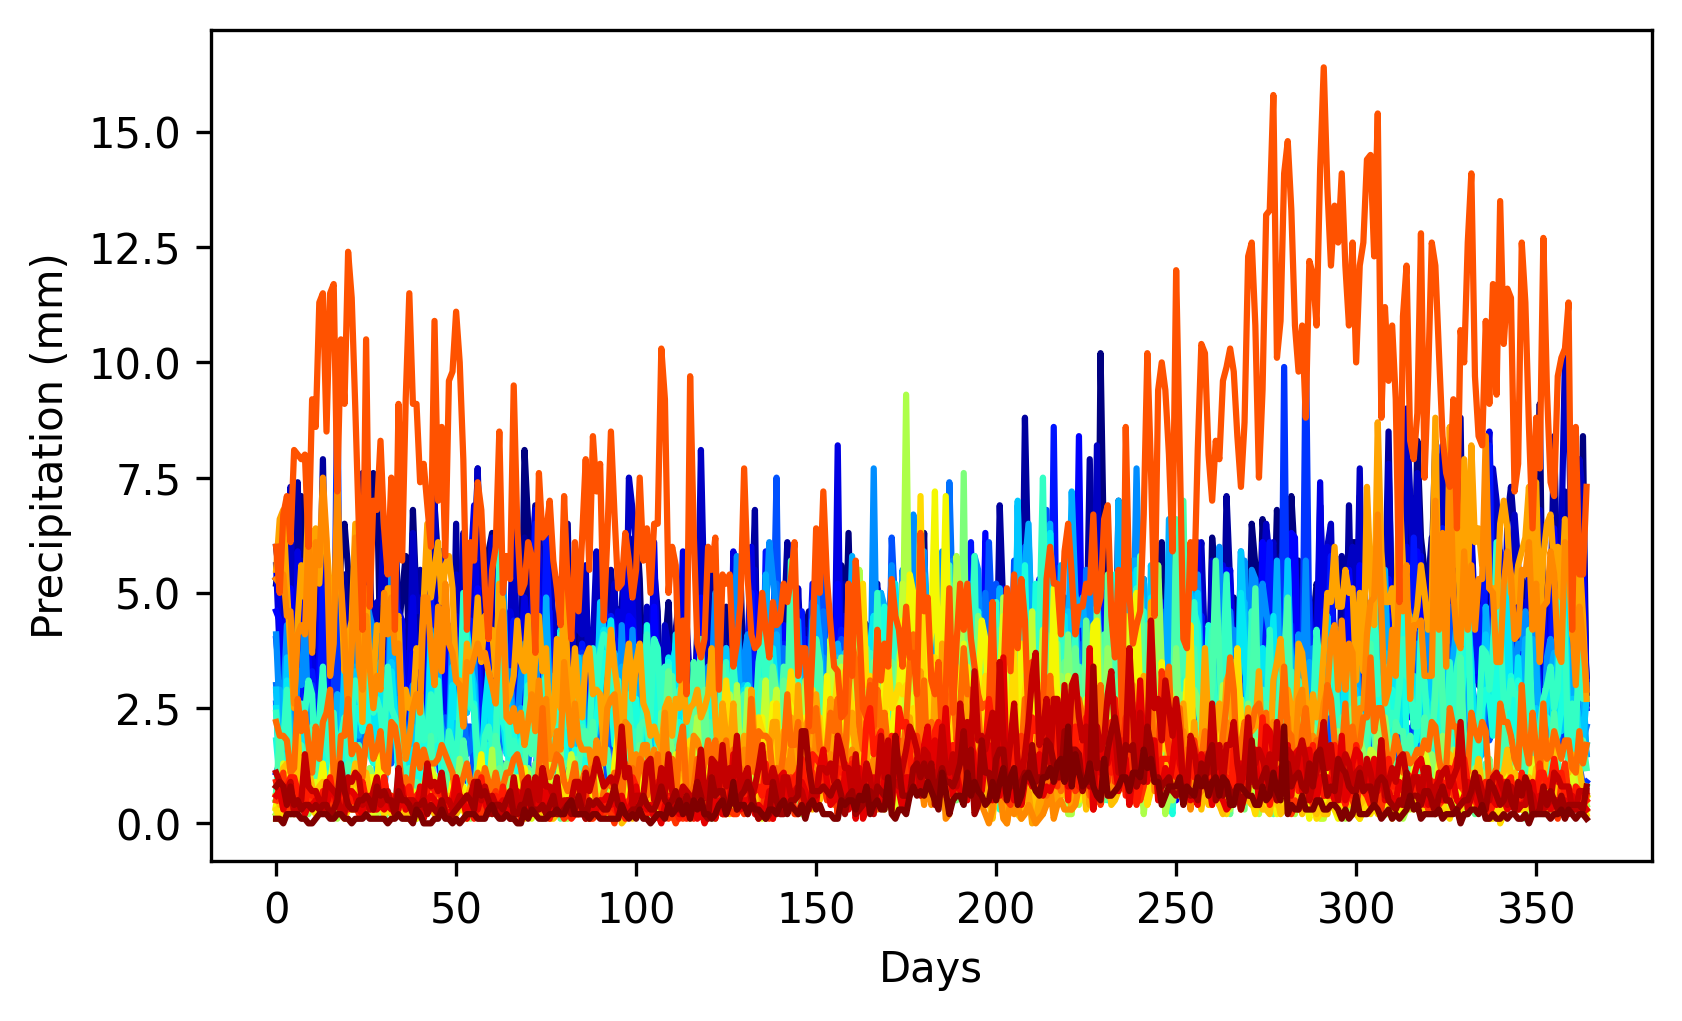

In [8]:
# Plot precipitation
plt.figure(figsize=(6.2, 3.6), facecolor='white', edgecolor='black',dpi=300)
ax = plot(prec_data)
ax.set_xlabel('Days')
ax.set_ylabel('Precipitation (mm)')

plt.savefig('./figures/precipitation.eps', transparent=True, format='eps')
plt.show()

In [22]:
# Create MultivariateFunctionalData
fdata = MultivariateFunctionalData([temp_data, prec_data])
fdata = fdata.smooth()

In [23]:
# MFPCA with Gram matrix
mfpca = MFPCA(n_components=3, method='inner-product')
mfpca.fit(fdata)

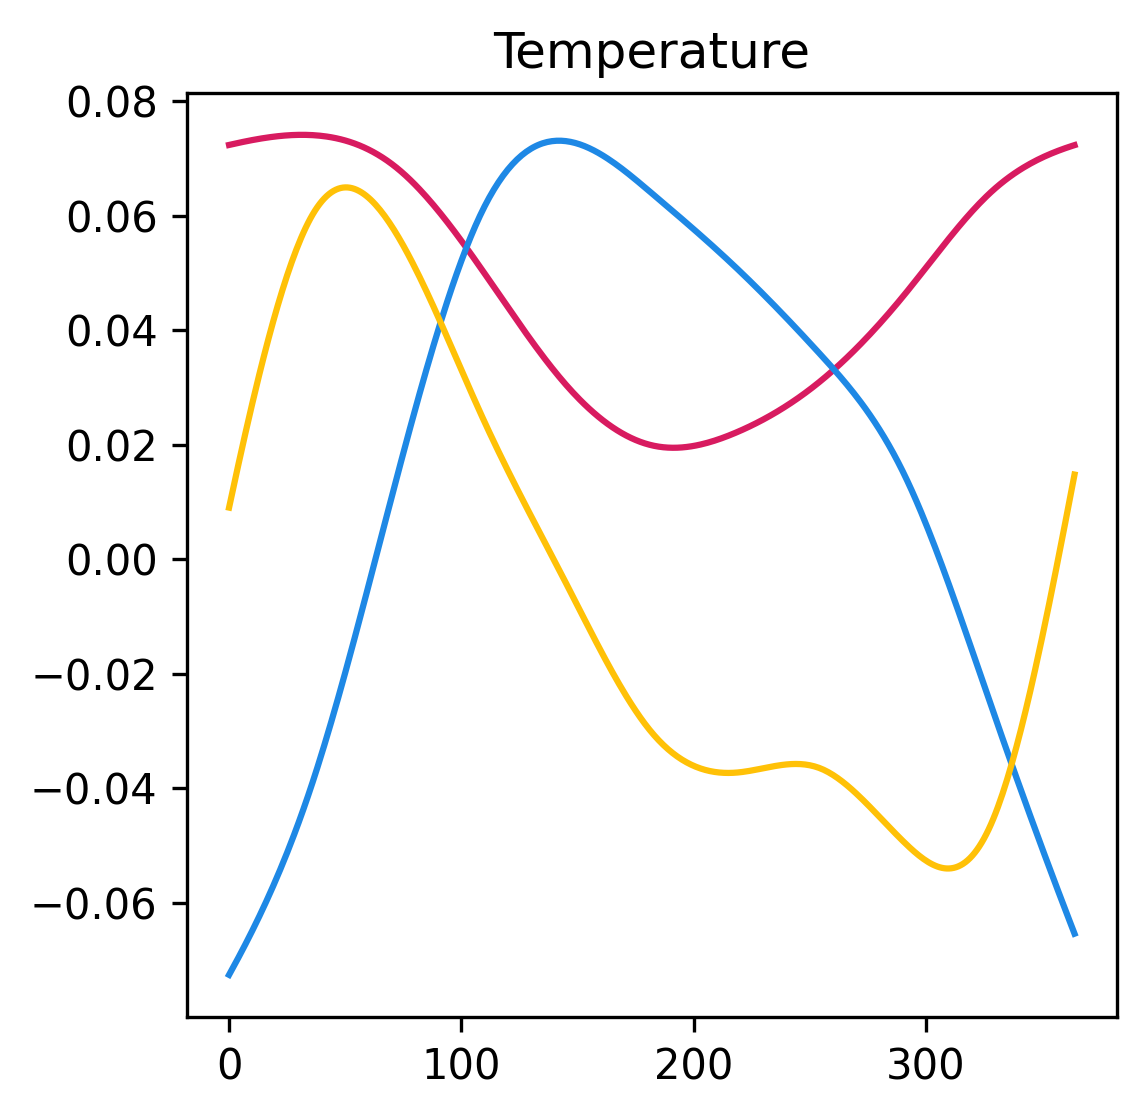

In [31]:
plt.figure(figsize=(4, 4), facecolor='white', edgecolor='black',dpi=300)
ax = plot(mfpca.eigenfunctions.data[0], colors=["#D81B60", "#1E88E5", "#FFC107"])
ax.set_title("Temperature")

plt.savefig('./figures/eigen_temp_gram.eps', transparent=True, format='eps')
plt.show()

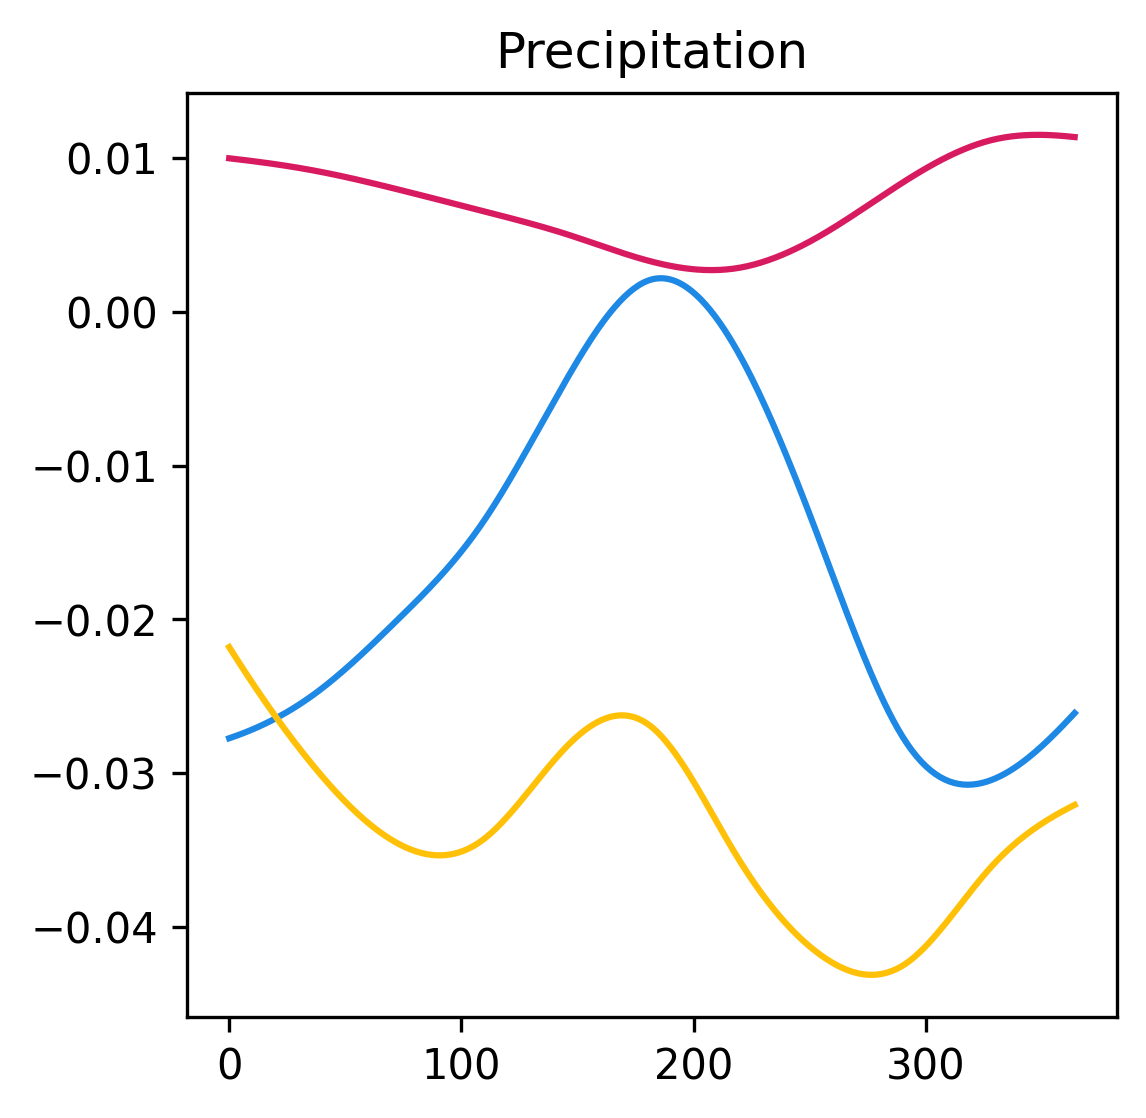

In [30]:
plt.figure(figsize=(4, 4), facecolor='white', edgecolor='black',dpi=300)
ax = plot(mfpca.eigenfunctions.data[1], colors=["#D81B60", "#1E88E5", "#FFC107"])
ax.set_title("Precipitation")

plt.savefig('./figures/eigen_prec_gram.eps', transparent=True, format='eps')
plt.show()

In [32]:
# MFPCA with UFPCA
univariate_expansions = [
    {'method': 'UFPCA', 'n_components': 5},
    {'method': 'UFPCA', 'n_components': 5}
]
mfpca = MFPCA(n_components=3, method='covariance', univariate_expansions=univariate_expansions)
mfpca.fit(fdata)

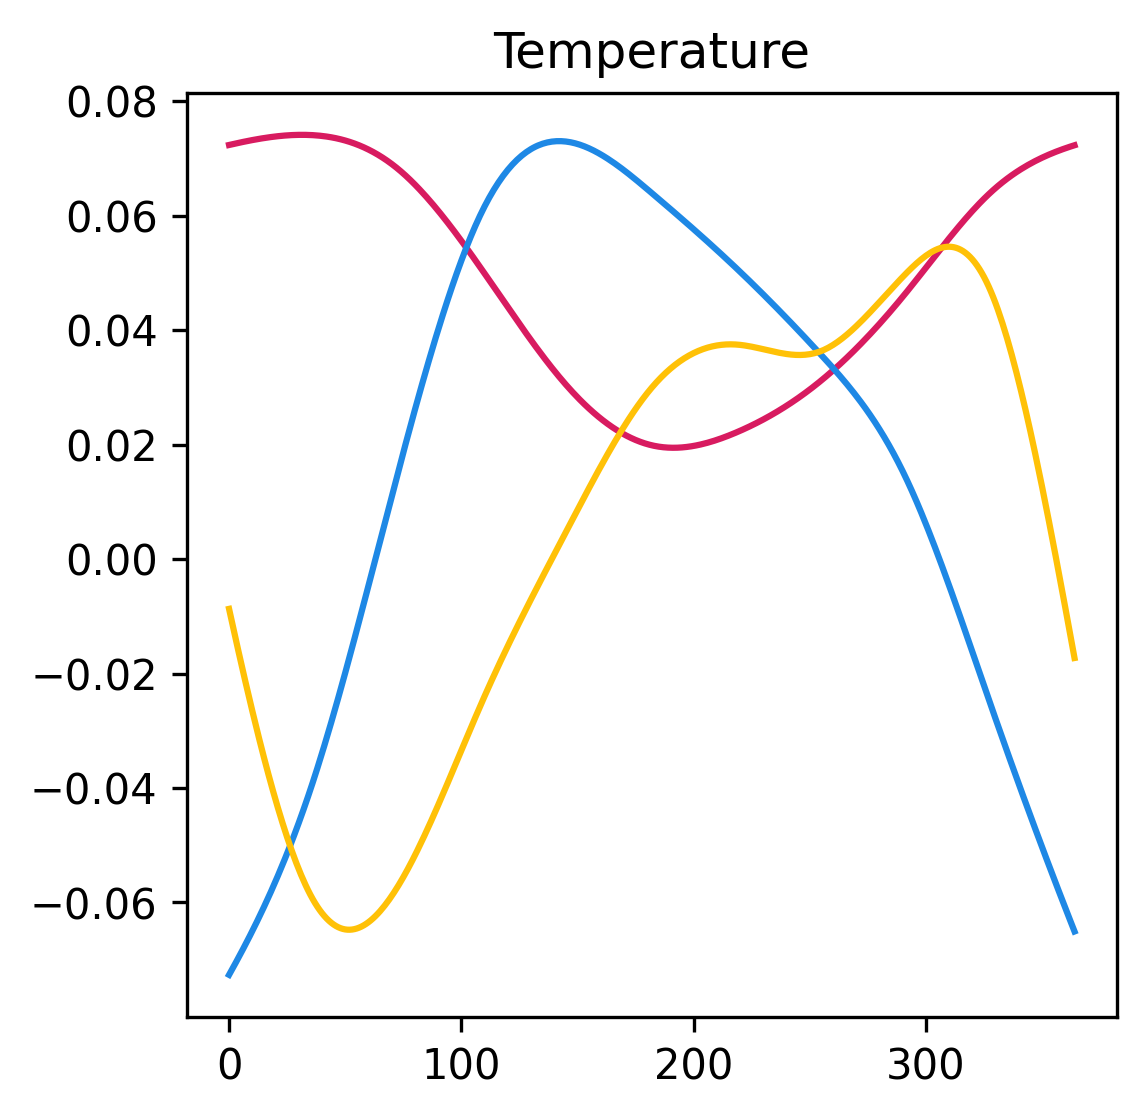

In [35]:
plt.figure(figsize=(4, 4), facecolor='white', edgecolor='black',dpi=300)
ax = plot(mfpca.eigenfunctions.data[0], colors=["#D81B60", "#1E88E5", "#FFC107"])
ax.set_title("Temperature")

plt.savefig('./figures/eigen_temp_cov.eps', transparent=True, format='eps')
plt.show()

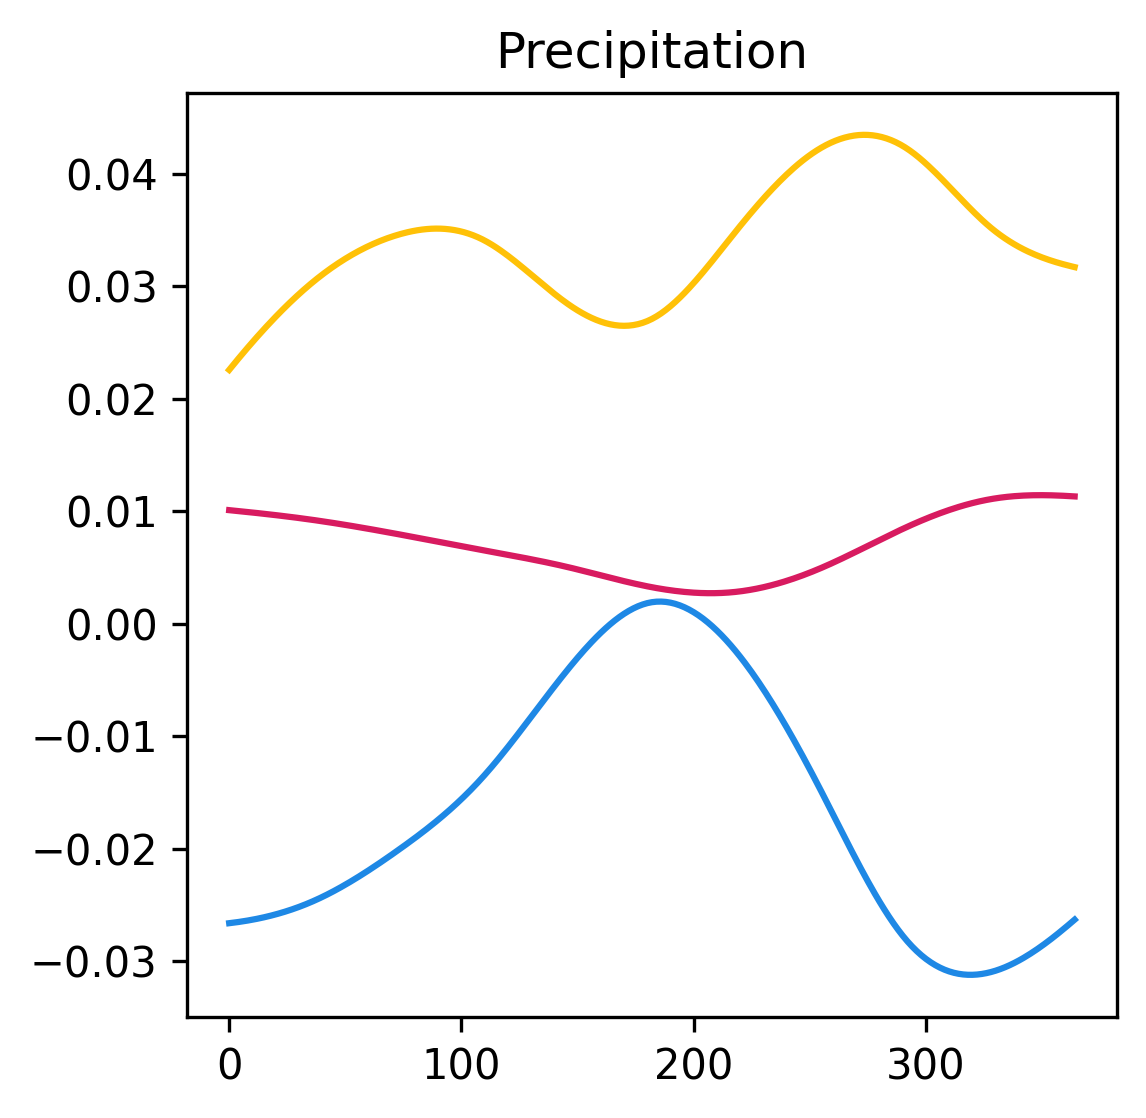

In [36]:
plt.figure(figsize=(4, 4), facecolor='white', edgecolor='black',dpi=300)
ax = plot(mfpca.eigenfunctions.data[1], colors=["#D81B60", "#1E88E5", "#FFC107"])
ax.set_title("Precipitation")

plt.savefig('./figures/eigen_prec_cov.eps', transparent=True, format='eps')
plt.show()

In [37]:
# MFPCA
univariate_expansions = [
    {'method': 'PSplines', 'penalty': 0},
    {'method': 'PSplines', 'penalty': 0}
]
mfpca = MFPCA(n_components=3, method='covariance', univariate_expansions=univariate_expansions)
mfpca.fit(fdata)

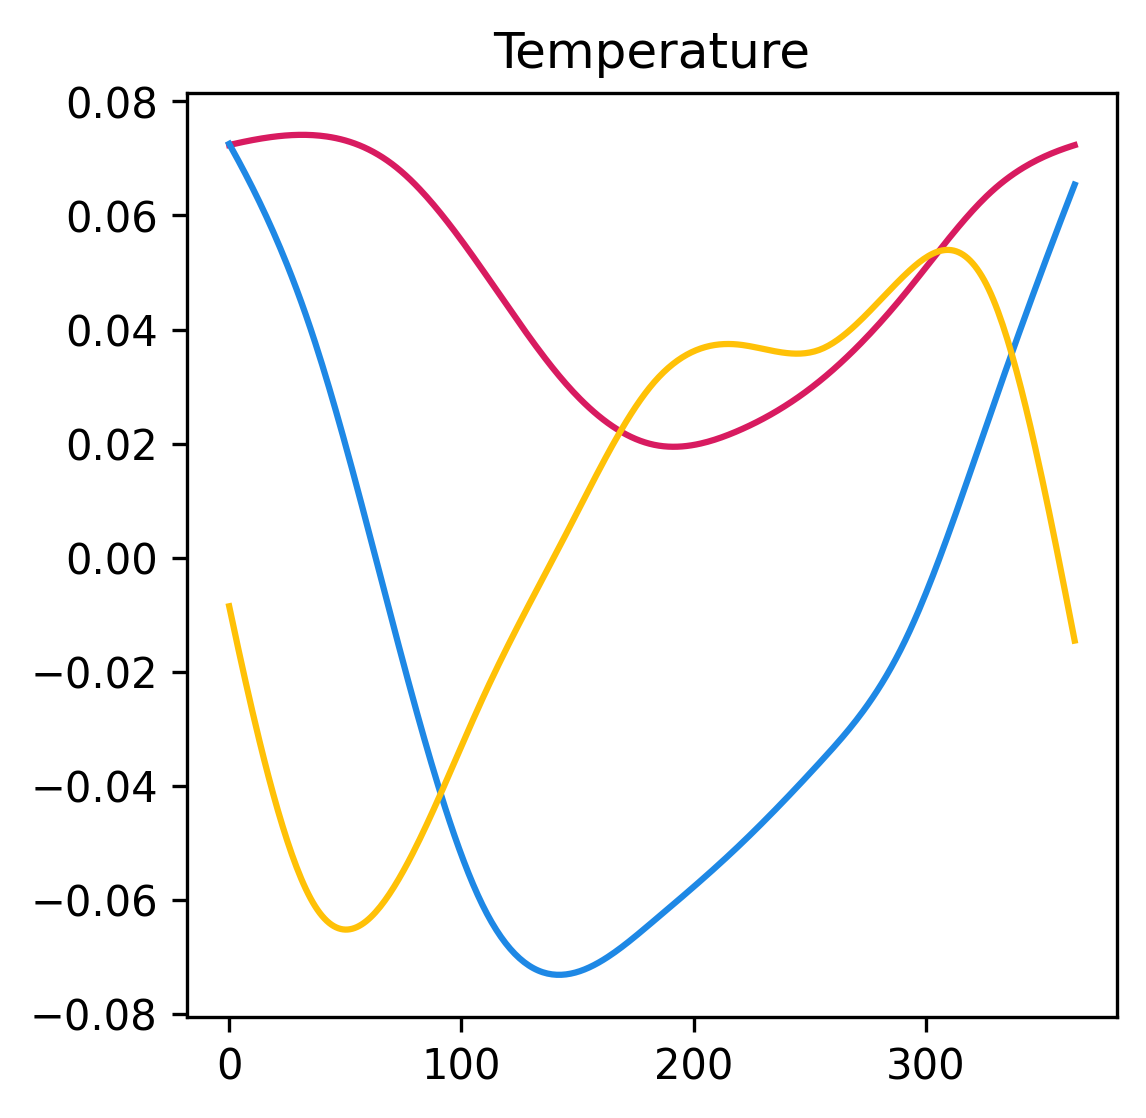

In [38]:
plt.figure(figsize=(4, 4), facecolor='white', edgecolor='black',dpi=300)
ax = plot(mfpca.eigenfunctions.data[0], colors=["#D81B60", "#1E88E5", "#FFC107"])
ax.set_title("Temperature")

plt.savefig('./figures/eigen_temp_psplines.eps', transparent=True, format='eps')
plt.show()

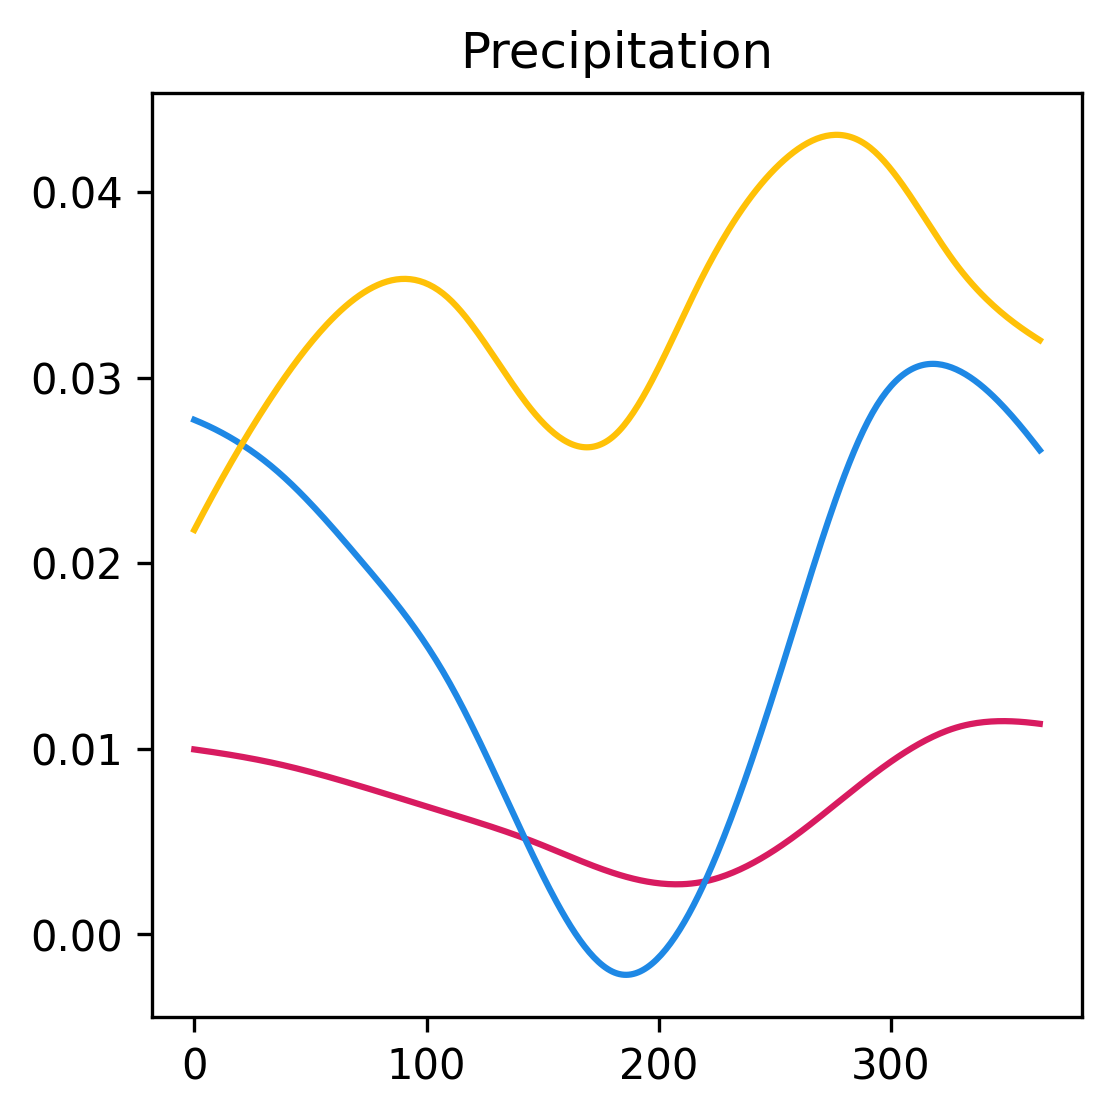

In [39]:
plt.figure(figsize=(4, 4), facecolor='white', edgecolor='black',dpi=300)
ax = plot(mfpca.eigenfunctions.data[1], colors=["#D81B60", "#1E88E5", "#FFC107"])
ax.set_title("Precipitation")

plt.savefig('./figures/eigen_prec_psplines.eps', transparent=True, format='eps')
plt.show()